<a href="https://colab.research.google.com/github/felixartiga/ML_Project/blob/main/Proyecto_Regresion_Linear_Felix_Artiga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/datasets1/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [ ]:
data.corr()

<ipython-input-4-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
YearStart,1.000000,1.000000,NaN,-0.001504,-0.001504,-0.006593,0.003190,-0.011121,0.044424
YearEnd,1.000000,1.000000,NaN,-0.001504,-0.001504,-0.006593,0.003190,-0.011121,0.044424
Data_Value_Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value,-0.001504,-0.001504,NaN,1.000000,1.000000,0.956605,0.941565,-0.005854,-0.002525
Data_Value_Alt,-0.001504,-0.001504,NaN,1.000000,1.000000,0.956605,0.941565,-0.005854,-0.002525
Low_Confidence_Limit,-0.006593,-0.006593,NaN,0.956605,0.956605,1.000000,0.804783,0.048949,0.012457
High_Confidence_Limit,0.003190,0.003190,NaN,0.941565,0.941565,0.804783,1.000000,-0.063228,-0.018078
Sample_Size,-0.011121,-0.011121,NaN,-0.005854,-0.005854,0.048949,-0.063228,1.000000,0.162963
LocationID,0.044424,0.044424,NaN,-0.002525,-0.002525,0.012457,-0.018078,0.162963,1.000000


Feature Selection for Regression Model

In [ ]:
data_test = data.iloc[:,[10,15]]
data_test.head()

,Data_Value,High_Confidence_Limit
0,32.0,33.5
1,32.3,34.7
2,31.8,33.6
3,33.6,37.6
4,32.8,35.6


In [ ]:
data_index = data.iloc[:,[10,15]]
data_index.head()

,Data_Value,High_Confidence_Limit
0,32.0,33.5
1,32.3,34.7
2,31.8,33.6
3,33.6,37.6
4,32.8,35.6


In [ ]:
data_name = data.iloc[:,[10,15]]
data_name.head()

,Data_Value,High_Confidence_Limit
0,32.0,33.5
1,32.3,34.7
2,31.8,33.6
3,33.6,37.6
4,32.8,35.6


In [ ]:
data = data.iloc[:,[10,15]]
data.head()

,Data_Value,High_Confidence_Limit
0,32.0,33.5
1,32.3,34.7
2,31.8,33.6
3,33.6,37.6
4,32.8,35.6


plot

<function matplotlib.pyplot.show(close=None, block=None)>

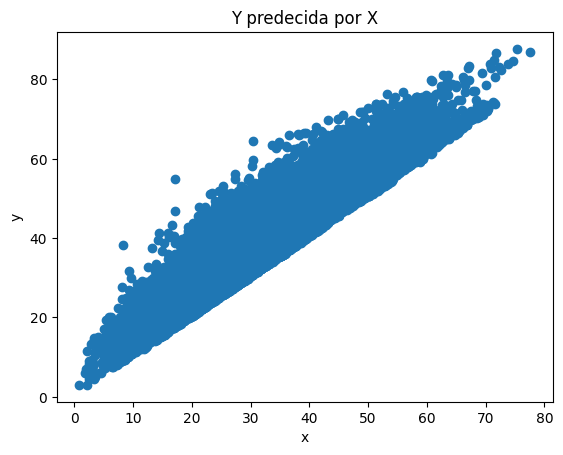

In [ ]:
plt.scatter(data["Data_Value"],data["High_Confidence_Limit "])
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

#Test Train Split


In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imp.fit(data)
data.iloc[:,:] = imputer.transform(data)
data


,Data_Value,High_Confidence_Limit
0,32.000000,33.500000
1,32.300000,34.700000
2,31.800000,33.600000
3,33.600000,37.600000
4,32.800000,35.600000
...,...,...
53387,31.156681,35.989997
53388,31.156681,35.989997
53389,31.156681,35.989997
53390,31.156681,35.989997


In [ ]:
X = data["Data_Value"].values.reshape(-1, 1)
y = data["High_Confidence_Limit "]




In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y)

In [ ]:
print(X_train)

[[33.4]
 [47.6]
 [25.3]
 ...
 [14. ]
 [31.8]
 [14.4]]


#Training Model

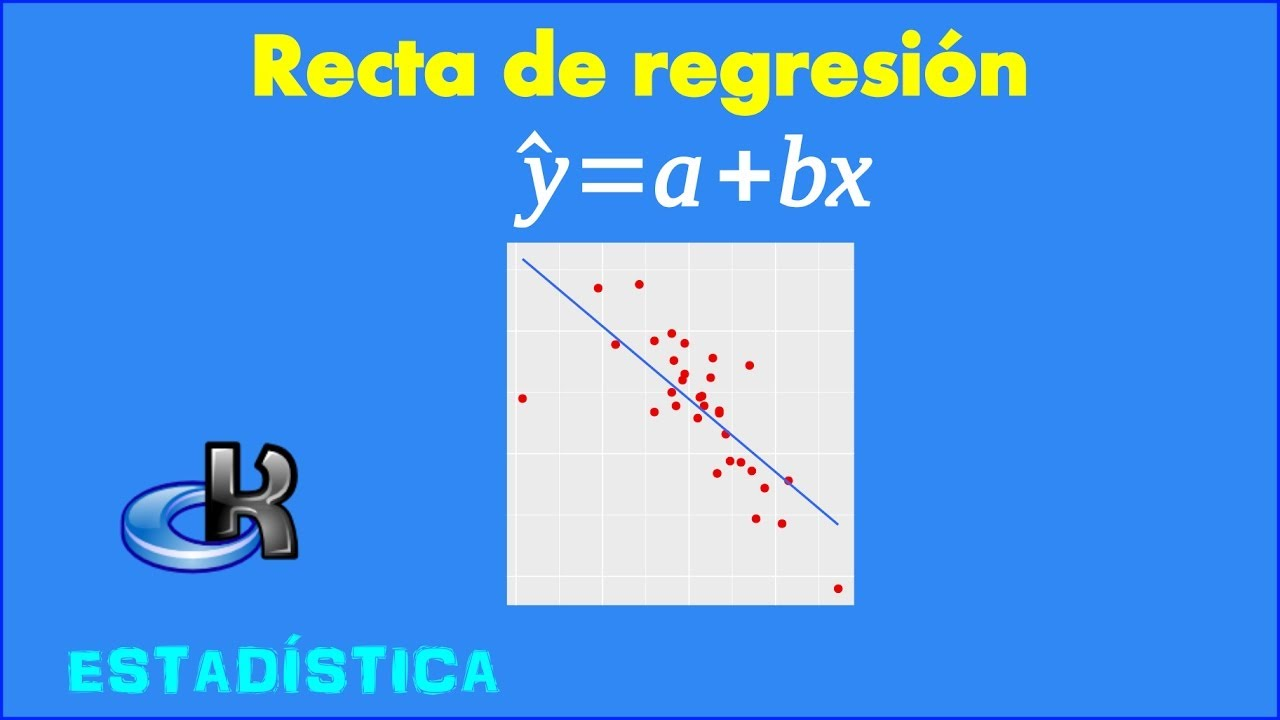

In [ ]:
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

coeficientes = reg.coef_
intercepta = reg.intercept_

#coeficientes
print("coeficientes : ",coeficientes[0])

#intercepta:
print("intercepta: ",intercepta)

coeficientes :  1.0296545159064454
intercepta:  3.9144990877762353


In [ ]:
print(reg)

LinearRegression()


Prediciendo Valores Del set de datos

In [ ]:
predicted_data = reg.predict(X)
predicted_data

array([36.8634436 , 37.17233995, 36.65751269, ..., 35.99511639,
       35.99511639, 35.99511639])

In [ ]:
predicted_train = reg.predict(X_train)

In [ ]:
predicted_test = reg.predict(X_test)

Ploting Regression


<function matplotlib.pyplot.show(close=None, block=None)>

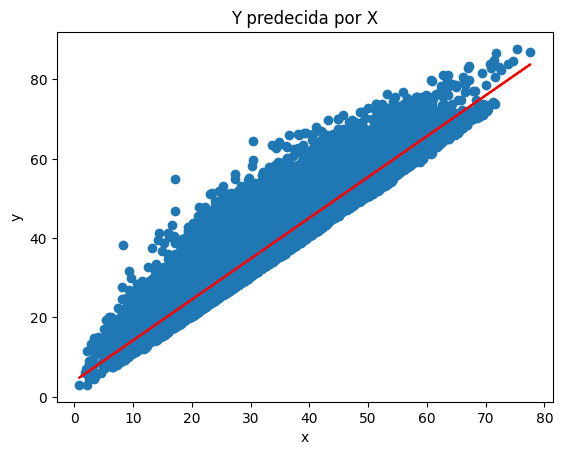

In [ ]:
plt.scatter(X,y)
plt.plot(X,predicted_data,color="red")
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

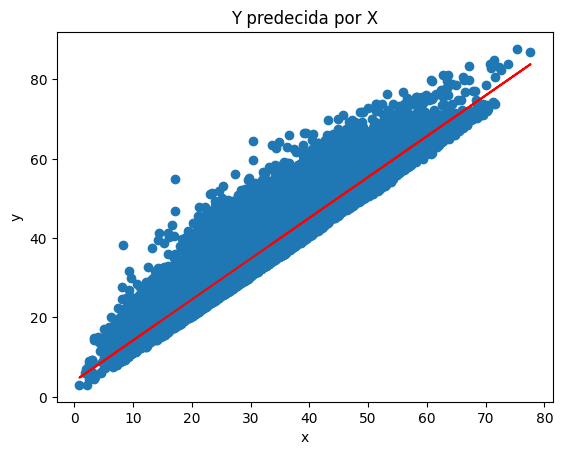

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,predicted_train,color="red")
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

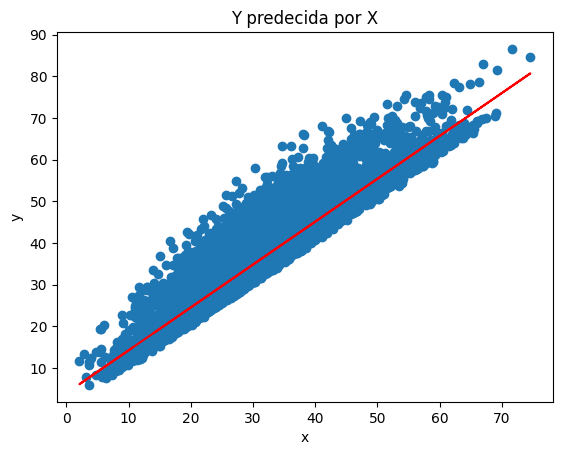

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,predicted_test,color="red")
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

Dataframe de actual y predecido

In [ ]:
A_P_data = pd.DataFrame({"actual":y,"predicted":predicted_data})

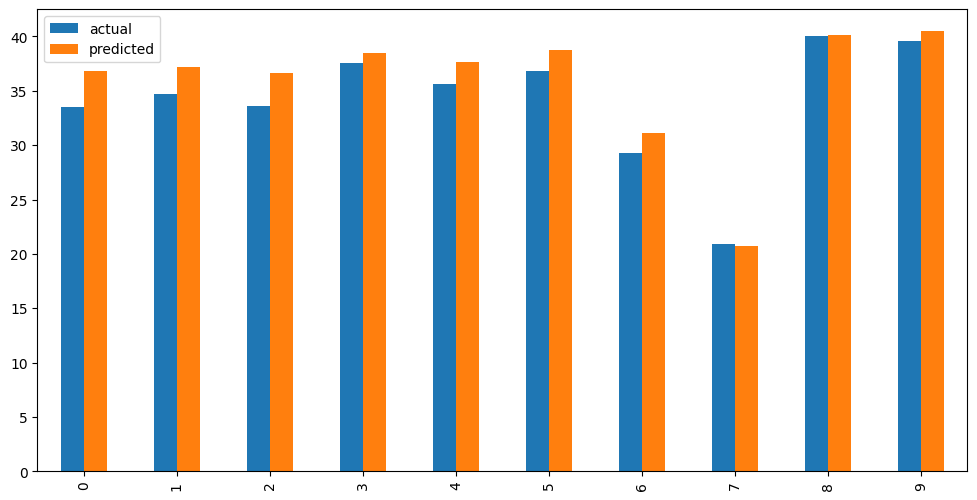

In [ ]:
A_P_data.head(10).plot(kind='bar',figsize=(12,6))
plt.show()

Error de predicción

In [ ]:
y_predict = reg.predict(X_test)

res = (y_predict - y_test)
RSS = (res*res).sum()

print("residual de suma de cuadrados: ",RSS)

residual de suma de cuadrados:  173626.19340448786
